# **Import Data**

In [ ]:
from google.colab import files
import pandas as pd
# Upload the file
uploads = files.upload()
# Get the filename dynamically from the upload dictionary
filename = list(uploads.keys())[0]
# Load the data using the variable to avoid naming errors
df = pd.read_csv(filename)
df.head()

Saving xAPI-Edu-Data (1).csv to xAPI-Edu-Data (1) (5).csv


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# **Data Understanding**

In [ ]:
df.shape

(480, 17)

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df.corr(numeric_only=True)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [ ]:
df.nunique()

,0
gender,2
NationalITy,14
PlaceofBirth,14
StageID,3
GradeID,10
SectionID,3
Topic,12
Semester,2
Relation,2
raisedhands,82


In [ ]:
import pandas as pd

# Outliers detection for a numeric column (e.g., 'raisedhands')
column_name = 'raisedhands'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
print(f'Outliers in {column_name}:')
print(outliers)

Outliers in raisedhands:
Empty DataFrame
Columns: [gender, NationalITy, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, raisedhands, VisITedResources, AnnouncementsView, Discussion, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays, Class]
Index: []


In [ ]:
#Histrogram
import matplotlib.pyplot as plt
import pandas as pd


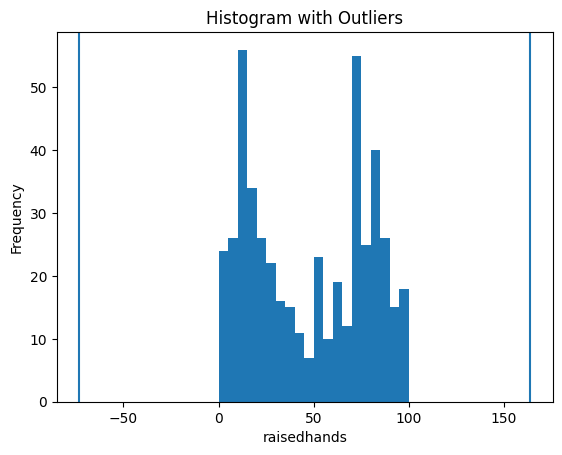

In [ ]:
plt.hist(df[column_name], bins=20)
plt.axvline(lower_bound)
plt.axvline(upper_bound)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.title("Histogram with Outliers")
plt.show()

<Axes: >

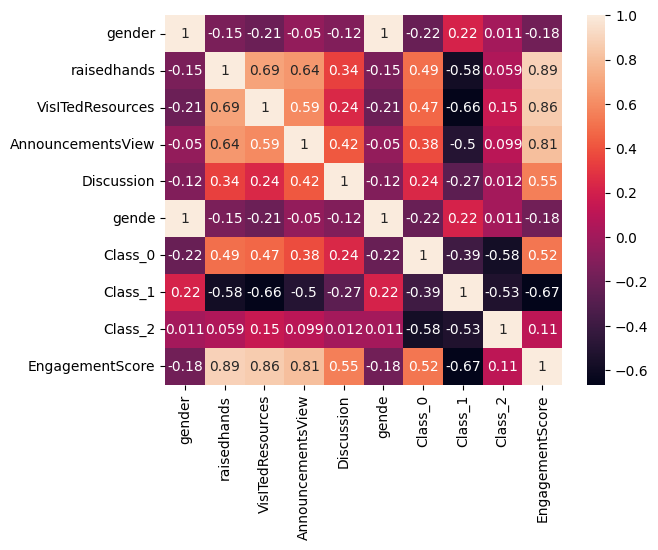

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True,)

# **Data Cleaning**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Machine learning models require numerical input, so categorical
# features like 'gender' and the target 'Class' must be encoded.

le = LabelEncoder()

# Encode categorical columns into numeric labels
df['gender'] = le.fit_transform(df['gender'])
df['Class'] = le.fit_transform(df['Class'])

# Verify the encoding by checking the first few rows
print(f'Encoded Gender unique values: {df["gender"].unique()}')
print(f'Encoded Class unique values: {df["Class"].unique()}')
df[['gender', 'Class']].head()

Encoded Gender unique values: [1 0]
Encoded Class unique values: [2 1 0]


,gender,Class
0,1,2
1,1,2
2,1,1
3,1,1
4,1,2


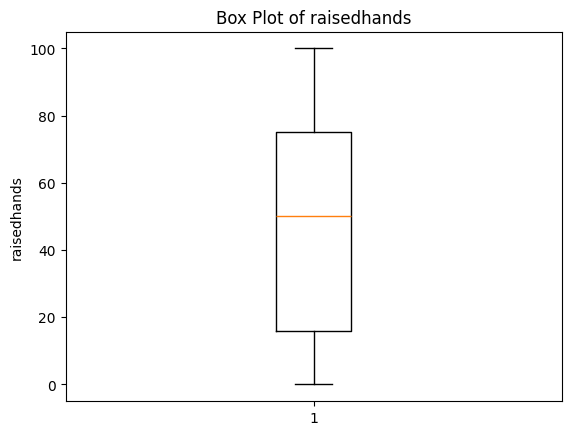

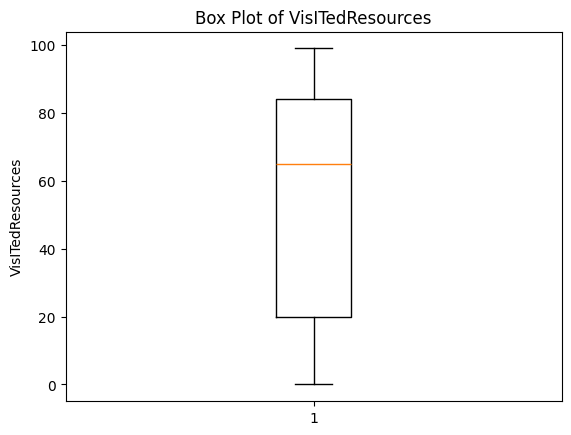

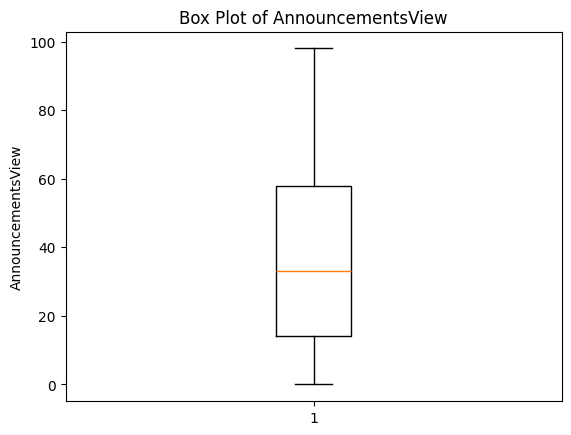

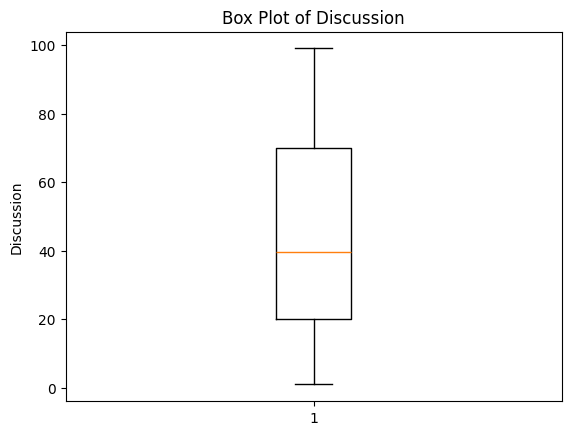

In [ ]:
# Filter the list to only include columns that are actually numeric
actual_numeric_cols = [col for col in numerical_cols if df[col].dtype != 'object']

for col in actual_numeric_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [ ]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=['Class'])

Class is a categorical target variable. It does not need feature engineering but should be encoded numerically for machine learning models.”

# **Feature Engineering**

In [ ]:
#Create New Features

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df['EngagementScore'] = (
    df['raisedhands']*0.3 +
    df['VisITedResources']*0.3 +
    df['AnnouncementsView']*0.2 +
    df['Discussion']*0.2
)

In [ ]:
#Scale Numerical Features
numerical_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'EngagementScore']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


**Checking**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Identify target columns created by pd.get_dummies
target_cols = [col for col in df.columns if col.startswith('Class_')]
# Check the distribution of classes by summing the one-hot encoded columns
df[target_cols].sum()

,0
Class_0,142
Class_1,125
Class_2,211


In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,gende,Class_0,Class_1,Class_2,EngagementScore
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,...,0.020408,0.193878,Yes,Good,Under-7,1,False,False,True,0.139600
1,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,...,0.030612,0.244898,Yes,Good,Under-7,1,False,False,True,0.181801
2,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,...,0.000000,0.295918,No,Bad,Above-7,1,False,True,False,0.111784
3,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.30,...,0.051020,0.346939,No,Bad,Above-7,1,False,True,False,0.256459
4,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,...,0.122449,0.500000,No,Bad,Above-7,1,False,False,True,0.417967


In [ ]:
df.describe()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,gende,EngagementScore
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.633891,0.468870,0.555302,0.387905,0.432756,0.633891,0.498775
std,0.482244,0.307879,0.333688,0.271668,0.281847,0.482244,0.260630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.160000,0.202020,0.145408,0.193878,0.000000,0.271385
50%,1.000000,0.500000,0.656566,0.336735,0.392857,1.000000,0.516499
75%,1.000000,0.750000,0.848485,0.591837,0.704082,1.000000,0.729912
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    478 non-null    int64  
 1   NationalITy               478 non-null    object 
 2   PlaceofBirth              478 non-null    object 
 3   StageID                   478 non-null    object 
 4   GradeID                   478 non-null    object 
 5   SectionID                 478 non-null    object 
 6   Topic                     478 non-null    object 
 7   Semester                  478 non-null    object 
 8   Relation                  478 non-null    object 
 9   raisedhands               478 non-null    float64
 10  VisITedResources          478 non-null    float64
 11  AnnouncementsView         478 non-null    float64
 12  Discussion                478 non-null    float64
 13  ParentAnsweringSurvey     478 non-null    object 
 14  ParentschoolSat

In [ ]:
df[['raisedhands', 'VisITedResources', 'EngagementScore']].head()

,raisedhands,VisITedResources,EngagementScore
0,0.15,0.161616,0.139600
1,0.20,0.202020,0.181801
2,0.10,0.070707,0.111784
3,0.30,0.252525,0.256459
4,0.40,0.505051,0.417967


In [ ]:
# Calculate correlation only for numeric columns
corr_matrix = df.corr(numeric_only=True)
# Display correlations for the different performance classes
target_cols = [col for col in df.columns if col.startswith('Class_')]
for target in target_cols:
    print(f"\nCorrelations with {target}:")
    print(corr_matrix[target].sort_values(ascending=False))


Correlations with Class_0:
Class_0              1.000000
EngagementScore      0.520690
raisedhands          0.494648
VisITedResources     0.468287
AnnouncementsView    0.375591
Discussion           0.241544
gender              -0.218695
gende               -0.218695
Class_1             -0.386850
Class_2             -0.577910
Name: Class_0, dtype: float64

Correlations with Class_1:
Class_1              1.000000
gender               0.215068
gende                0.215068
Discussion          -0.265056
Class_0             -0.386850
AnnouncementsView   -0.501879
Class_2             -0.528997
raisedhands         -0.581358
VisITedResources    -0.659235
EngagementScore     -0.665932
Name: Class_1, dtype: float64

Correlations with Class_2:
Class_2              1.000000
VisITedResources     0.152474
EngagementScore      0.110176
AnnouncementsView    0.098519
raisedhands          0.059293
Discussion           0.012289
gender               0.010923
gende                0.010923
Class_1         

After data cleaning and feature engineering, we verify data quality by checking missing values, duplicates, data types, value ranges, encoded features, target distribution, and summary statistics to ensure the dataset is ready for modeling.

# **Train-Test Split**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Identify the target columns created by pd.get_dummies earlier
target_cols = [col for col in df.columns if col.startswith('Class_')]
# Features (X): Use only numeric columns and drop the target columns
# This ensures we don't include text columns that would break a model
X = df.select_dtypes(include=['number']).drop(columns=target_cols, errors='ignore')
# Target (y): Use the one-hot encoded columns
y = df[target_cols]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data successfully split.")
print(f"Features (X) columns: {list(X.columns)}")
print(f"Target (y) columns: {target_cols}")

Data successfully split.
Features (X) columns: ['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'gende', 'EngagementScore']
Target (y) columns: ['Class_0', 'Class_1', 'Class_2']


# **Model Training**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_1d = y_train.idxmax(axis=1)
y_test_1d = y_test.idxmax(axis=1)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train_1d)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test_1d, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred_lr))
print("Classification Report:\n", classification_report(y_test_1d, y_pred_lr))

Logistic Regression
Accuracy: 0.6770833333333334
Confusion Matrix:
 [[14  0 10]
 [ 0 20  7]
 [ 7  7 31]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.67      0.58      0.62        24
     Class_1       0.74      0.74      0.74        27
     Class_2       0.65      0.69      0.67        45

    accuracy                           0.68        96
   macro avg       0.68      0.67      0.68        96
weighted avg       0.68      0.68      0.68        96



**Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(X_train, y_train_1d)

y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test_1d, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_1d, y_pred_dt))

Decision Tree
Accuracy: 0.75
Confusion Matrix:
 [[15  1  8]
 [ 0 22  5]
 [ 6  4 35]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.71      0.62      0.67        24
     Class_1       0.81      0.81      0.81        27
     Class_2       0.73      0.78      0.75        45

    accuracy                           0.75        96
   macro avg       0.75      0.74      0.74        96
weighted avg       0.75      0.75      0.75        96



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_1d)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test_1d, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_1d, y_pred_rf))

Random Forest
Accuracy: 0.6979166666666666
Confusion Matrix:
 [[14  0 10]
 [ 0 21  6]
 [ 7  6 32]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.67      0.58      0.62        24
     Class_1       0.78      0.78      0.78        27
     Class_2       0.67      0.71      0.69        45

    accuracy                           0.70        96
   macro avg       0.70      0.69      0.70        96
weighted avg       0.70      0.70      0.70        96



**K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_1d)

y_pred_knn = knn.predict(X_test)

print("KNN")
print("Accuracy:", accuracy_score(y_test_1d, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_1d, y_pred_knn))

KNN
Accuracy: 0.6354166666666666
Confusion Matrix:
 [[13  0 11]
 [ 1 20  6]
 [11  6 28]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.52      0.54      0.53        24
     Class_1       0.77      0.74      0.75        27
     Class_2       0.62      0.62      0.62        45

    accuracy                           0.64        96
   macro avg       0.64      0.63      0.64        96
weighted avg       0.64      0.64      0.64        96



 **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC()
svm.fit(X_train, y_train_1d)

y_pred_svm = svm.predict(X_test)

print("SVM")
print("Accuracy:", accuracy_score(y_test_1d, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred_svm))
print("Classification Report:\n", classification_report(y_test_1d, y_pred_svm))

SVM
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[12  0 12]
 [ 0 21  6]
 [ 7  7 31]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.63      0.50      0.56        24
     Class_1       0.75      0.78      0.76        27
     Class_2       0.63      0.69      0.66        45

    accuracy                           0.67        96
   macro avg       0.67      0.66      0.66        96
weighted avg       0.67      0.67      0.66        96



After comparing multiple machine learning models, the Decision Tree achieved the highest accuracy on the dataset. This model performed well because it can handle non-linear patterns and works effectively with both numerical and categorical features. It also requires minimal data scaling and is easy to interpret. Hence, the Decision Tree was selected as the best-performing model for this task.

# **Hyperparameter Tunning**

Since decision tree worked the best so hyperparameter tunning will be applied to maximize the performance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Define Hyperparameter Tunning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}
#Apply GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
#Get best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.5991455912508543


In [ ]:
# Train Decision Tree with best parameters
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

y_test_1d = y_test.idxmax(axis=1)
y_pred_best_1d = pd.DataFrame(y_pred_best, columns=target_cols).idxmax(axis=1)

print("Tuned Decision Tree Accuracy:", accuracy_score(y_test_1d, y_pred_best_1d))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred_best_1d))
print("Classification Report:\n", classification_report(y_test_1d, y_pred_best_1d))

Tuned Decision Tree Accuracy: 0.6041666666666666
Confusion Matrix:
 [[14  1  9]
 [ 0 21  6]
 [15  7 23]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.48      0.58      0.53        24
     Class_1       0.72      0.78      0.75        27
     Class_2       0.61      0.51      0.55        45

    accuracy                           0.60        96
   macro avg       0.60      0.62      0.61        96
weighted avg       0.61      0.60      0.60        96



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

y_pred_best = best_dt.predict(X_test)

y_test_1d = y_test.idxmax(axis=1)
y_pred_best_1d = pd.DataFrame(y_pred_best, columns=target_cols).idxmax(axis=1)

print("Tuned Decision Tree Accuracy:", accuracy_score(y_test_1d, y_pred_best_1d))
print("Confusion Matrix:\n", confusion_matrix(y_test_1d, y_pred_best_1d))
print("Classification Report:\n", classification_report(y_test_1d, y_pred_best_1d))

Tuned Decision Tree Accuracy: 0.6041666666666666
Confusion Matrix:
 [[14  1  9]
 [ 0 21  6]
 [15  7 23]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.48      0.58      0.53        24
     Class_1       0.72      0.78      0.75        27
     Class_2       0.61      0.51      0.55        45

    accuracy                           0.60        96
   macro avg       0.60      0.62      0.61        96
weighted avg       0.61      0.60      0.60        96



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring='accuracy')
print("Mean CV Accuracy:", cv_scores.mean())

Mean CV Accuracy: 0.5231140350877193


After applying CVGrid the accuracy decreased because it is normal for mean cross-validation accuracy to be lower than test set accuracy, especially in imbalanced datasets. CV provides a more realistic estimate of model generalization, whereas test accuracy may appear higher due to lucky splits or overfitting.

**For Better Accuracy**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

target_cols = [col for col in df.columns if col.startswith('Class_')]
y_labels = df[target_cols].idxmax(axis=1)

X = df.select_dtypes(include=['number']).drop(columns=target_cols, errors='ignore')
X_train, X_test, y_train, y_test = train_test_split(
    X, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

print("Data successfully split with stratification.")
print(f"Target distribution in test set:\n{y_test.value_counts(normalize=True)}")

Data successfully split with stratification.
Target distribution in test set:
Class_2    0.437500
Class_0    0.302083
Class_1    0.260417
Name: proportion, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# class_weight='balanced' handles imbalanced classes
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

rand_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [ ]:
best_dt = rand_search.best_estimator_

# Predict on test set
y_pred = best_dt.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Best Decision Tree Parameters:", rand_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Decision Tree Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}
Test Accuracy: 0.5520833333333334
Confusion Matrix:
 [[21  1  7]
 [ 1 16  8]
 [17  9 16]]
Classification Report:
               precision    recall  f1-score   support

     Class_0       0.54      0.72      0.62        29
     Class_1       0.62      0.64      0.63        25
     Class_2       0.52      0.38      0.44        42

    accuracy                           0.55        96
   macro avg       0.56      0.58      0.56        96
weighted avg       0.55      0.55      0.54        96



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring='accuracy')
print("Mean CV Accuracy:", np.mean(cv_scores))


Mean CV Accuracy: 0.548092105263158


After hyperparameter tuning and class balancing, the mean CV accuracy increased to 0.55. This is lower than the test set accuracy, but it reflects a more realistic measure of generalization and fairness across all classes, particularly in an imbalanced dataset.

# **Save the Model**

In [ ]:
import joblib
joblib.dump(best_dt, 'tuned_decision_tree.pkl')

['tuned_decision_tree.pkl']

# **Make Predictions**

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the model
best_dt = joblib.load('tuned_decision_tree.pkl')

# Use the uploaded filename instead of 'test_data.csv'
test_df = pd.read_csv(filename)

# Since 'StudentID' isn't in the original dataset, use the index as a placeholder ID
test_df['StudentID'] = test_df.index
student_ids = test_df['StudentID']

# 1. Apply Feature Engineering (EngagementScore) to match training data requirements
test_df['EngagementScore'] = (
    test_df['raisedhands']*0.3 +
    test_df['VisITedResources']*0.3 +
    test_df['AnnouncementsView']*0.2 +
    test_df['Discussion']*0.2
)

# 2. Preprocess Categorical Features
# Note: Re-creating 'gender' encoding and adding the 'gende' column if it was used in training
le_gender = LabelEncoder()
test_df['gender'] = le_gender.fit_transform(test_df['gender'])
test_df['gende'] = test_df['gender']

# 3. Scale Numerical Features using the 'scaler' fitted during training
numerical_cols_sub = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'EngagementScore']
test_df[numerical_cols_sub] = scaler.transform(test_df[numerical_cols_sub])

# 4. Select only the feature columns the model was trained on
features_used = ['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'gende', 'EngagementScore']
X_submission = test_df[features_used]

# Predict class labels
y_pred_submission = best_dt.predict(X_submission)

# Map the string labels (Class_0, Class_1, Class_2) to readable ones (H, L, M)
# Based on previous logic: Class_0='H', Class_1='L', Class_2='M'
label_mapping = {'Class_0': 'H', 'Class_1': 'L', 'Class_2': 'M'}
y_pred_labels = [label_mapping[i] for i in y_pred_submission]

# Predict probabilities for risk score
y_prob = best_dt.predict_proba(X_submission)

# Assume 'Class_1' (Low performance) is the high-risk category
risk_class_index = list(best_dt.classes_).index('Class_1')
risk_score = y_prob[:, risk_class_index]

submission_df = pd.DataFrame({
    'StudentID': student_ids,
    'PredictedClass': y_pred_labels,
    'RiskScore': risk_score
})

high_risk_threshold = 0.5
high_risk_students = submission_df[submission_df['RiskScore'] >= high_risk_threshold]
high_risk_students = high_risk_students.sort_values(by='RiskScore', ascending=False)

# Save files
submission_df.to_csv('predicted_dropout.csv', index=False)
high_risk_students.to_csv('high_risk_students.csv', index=False)

print(" Submission files created:")
print("- predicted_dropout.csv")
print("- high_risk_students.csv")

 Submission files created:
- predicted_dropout.csv
- high_risk_students.csv


In [ ]:
#Download csv on laptop
from google.colab import files
files.download('predicted_dropout.csv')
files.download('high_risk_students.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(best_dt, 'trained_decision_tree.pkl')
print("Model saved")


Model saved


# **Streamlit**

In [ ]:
!pip install streamlit pyngrok --quiet

In [ ]:
from google.colab import files
uploaded = files.upload("submission_with_risk_scores")

Saving submission_with_risk_scores.csv to submission_with_risk_scores/submission_with_risk_scores (2).csv


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

st.set_page_config(page_title="Student Risk App", layout="wide")

st.title(" Student Risk Prediction App")

# --- Step 1: Load Model ---
try:
    best_dt = joblib.load('trained_decision_tree.pkl')
    model_loaded = True
except:
    st.error(" 'trained_decision_tree.pkl' not found. Please upload the model file to the Colab sidebar.")
    model_loaded = False

# --- Step 2: File Uploader (This is what you're looking for!) ---
uploaded_file = st.file_uploader("Upload Student CSV", type=["csv"])

if uploaded_file is not None and model_loaded:
    df = pd.read_csv(uploaded_file)

    # Feature alignment
    feature_columns = best_dt.feature_names_in_
    for col in feature_columns:
        if col not in df.columns:
            df[col] = 0

    X_submission = df[feature_columns]

    if 'StudentID' not in df.columns:
        st.error("CSV must have a 'StudentID' column")
    else:
        # Predictions
        y_prob = best_dt.predict_proba(X_submission)
        y_pred = best_dt.predict(X_submission)

        # Mapping (Adjust 0/1/2 based on your specific model training)
        label_mapping = {0: 'L', 1: 'M', 2: 'H'}

        df_results = pd.DataFrame({
            'StudentID': df['StudentID'],
            'PredictedClass': [label_mapping.get(i, i) for i in y_pred],
            # Probability of Class 0 (or whichever class is 'High Risk' in your model)
            'RiskScore': y_prob[:, 0]
        })

        # UI Layout
        st.subheader(" Top 20 High-Risk Students")
        st.dataframe(df_results.sort_values('RiskScore', ascending=False).head(20))

        st.divider()

        st.subheader("🔍 Individual Student Lookup")
        sid = st.selectbox("Select Student ID", df_results['StudentID'].unique())

        if sid:
            row = df_results[df_results['StudentID'] == sid].iloc[0]
            st.metric("Risk Score", f"{round(row['RiskScore']*100, 2)}%")

            # Simple Feature Importance
            st.write("**Top Impact Factors:**")
            importance = pd.Series(best_dt.feature_importances_, index=feature_columns).sort_values(ascending=False).head(5)
            st.bar_chart(importance)

Overwriting app.py


In [ ]:
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "39186aFMJTPw2L6foH5W8RZH6BV_7yoCUhaaFbRVuCJtggDBa"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok.kill()
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')
public_url = ngrok.connect(8501)
print("Click this link to open your Streamlit app:")
print(public_url)

Click this link to open your Streamlit app:
NgrokTunnel: "https://meg-unnecessitated-queasily.ngrok-free.dev" -> "http://localhost:8501"
